In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("PH-Sales.csv")

In [3]:
dataset.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
dataset.rename(columns={'Number of Tractor Sold':'Sales'},inplace = True)

In [5]:
pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [6]:
Date_Month_Year = pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [7]:
Date_Month_Year.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October',
       ...
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object', length=144)

In [8]:
dataset['Months'] = Date_Month_Year.month_name()

In [9]:
Date_Month_Year.year

Int64Index([2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', length=144)

In [10]:
dataset['Years'] = Date_Month_Year.year

In [11]:
dataset

,Month-Year,Sales,Months,Years
0,Jan-03,141,January,2003
1,Feb-03,157,February,2003
2,Mar-03,185,March,2003
3,Apr-03,199,April,2003
4,May-03,203,May,2003
...,...,...,...,...
139,Aug-14,848,August,2014
140,Sep-14,640,September,2014
141,Oct-14,581,October,2014
142,Nov-14,519,November,2014


In [12]:
dataset.set_index(Date_Month_Year,inplace=True)

In [13]:
dataset.head()

,Month-Year,Sales,Months,Years
2003-01-01,Jan-03,141,January,2003
2003-02-01,Feb-03,157,February,2003
2003-03-01,Mar-03,185,March,2003
2003-04-01,Apr-03,199,April,2003
2003-05-01,May-03,203,May,2003


In [14]:
dataset.drop(columns = 'Month-Year', inplace = True )

In [15]:
dataset

,Sales,Months,Years
2003-01-01,141,January,2003
2003-02-01,157,February,2003
2003-03-01,185,March,2003
2003-04-01,199,April,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,August,2014
2014-09-01,640,September,2014
2014-10-01,581,October,2014
2014-11-01,519,November,2014


In [16]:
Tractor_Sale = dataset['Sales']

In [17]:
Tractor_Sale

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Sales, Length: 144, dtype: int64

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
seasonal_decompose(Tractor_Sale)

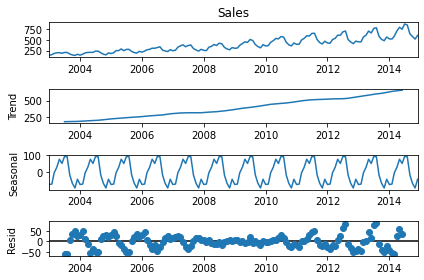

In [20]:
seasonal_decompose(Tractor_Sale).plot();

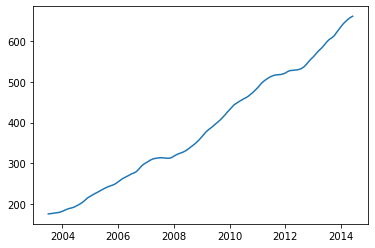

In [21]:
plt.plot(seasonal_decompose(Tractor_Sale).trend)

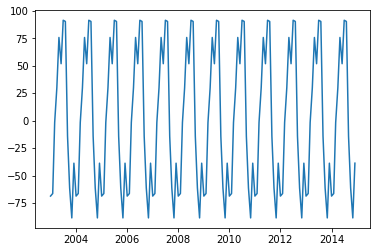

In [22]:
plt.plot(seasonal_decompose(Tractor_Sale).seasonal)

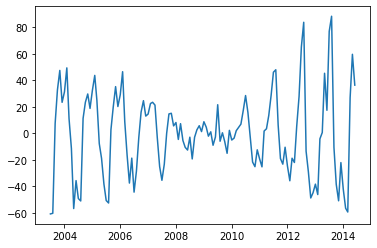

In [23]:
plt.plot(seasonal_decompose(Tractor_Sale).resid)

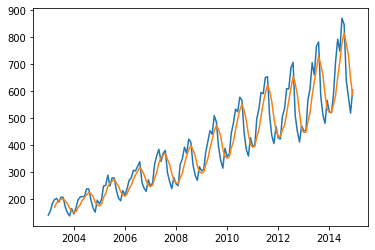

In [24]:
plt.plot(Tractor_Sale)
plt.plot(Tractor_Sale.rolling(window=4).mean())

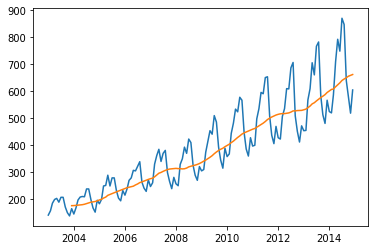

In [25]:
plt.plot(Tractor_Sale)
plt.plot(Tractor_Sale.rolling(window=12).mean())

In [26]:
Tractor_Sale

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Sales, Length: 144, dtype: int64

In [27]:
pd.pivot(dataset,values="Sales",index='Years',columns='Months')

Months,April,August,December,February,January,July,June,March,May,November,October,September
Years,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


<Axes: xlabel='Years'>

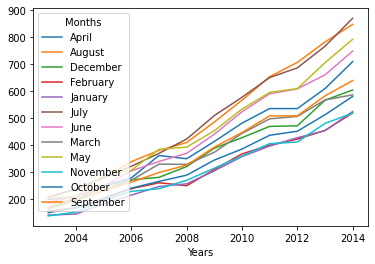

In [28]:
pd.pivot(dataset,values="Sales",index='Years',columns='Months').plot()

<Axes: >

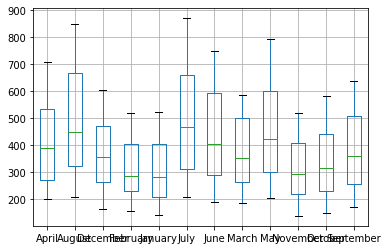

In [29]:
pd.pivot(dataset,values="Sales",index='Years',columns='Months').boxplot()

In [30]:
pd.pivot(dataset,values="Sales",index='Months',columns='Years')

Years,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Months,,,,,,,,,,,,
April,199,208,251,279,362,350,414,482,536,536,610,710
August,207,238,279,339,381,410,486,567,654,707,783,848
December,165,196,232,272,281,321,389,428,470,472,567,605
February,157,168,200,239,261,250,310,368,400,423,455,520
January,141,145,183,215,247,257,305,358,397,428,454,525
July,207,238,279,322,370,423,510,578,651,687,767,871
June,189,209,249,305,340,370,441,524,591,609,661,749
March,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


<Axes: xlabel='Months'>

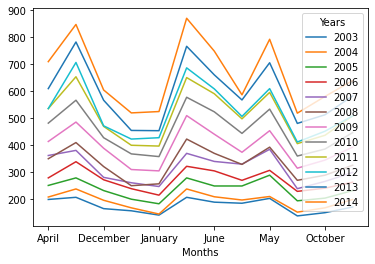

In [31]:
pd.pivot(dataset,values="Sales",index='Months',columns='Years').plot()

<Axes: >

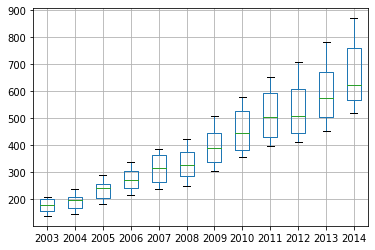

In [32]:
pd.pivot(dataset,values="Sales",index='Months',columns='Years').boxplot()

c:\Users\meena\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Sales', ylabel='Density'>

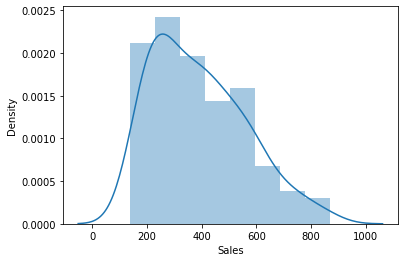

In [33]:
sns.distplot(Tractor_Sale)

In [34]:
from statsmodels.tsa.stattools import adfuller
adfuller(Tractor_Sale)

(1.1088250591467372,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)